The purpose of this notebook is to look into the make up of the NBA player population by way of their NBA position (C, PF, SF, PG, SG) year by year (from the NBA/ABA merger in 1977 to 2017)

This is to see how the NBA has evolved by position.

In [50]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
def nba_pos_counter(year):
    '''
    This function extracts data from the season totals page on basketball-reference.com.
    It takes in a str for year and returns a dictionary of NBA positons as keys 
    and values for the total number of players at that position for the input year
    
    input: str that represents a year from 1977 to 2017
    output: a dict of the NBA positional counts for that year
    
    >>> nba_pos_counter('1980')
    {'C': 52, 'PF': 55, 'PG': 49, 'SF': 67, 'SG': 63}
    '''
    from bs4 import BeautifulSoup
    from urllib.request import urlopen
    
    url = 'https://www.basketball-reference.com/leagues/NBA_'+year+'_totals.html'
    
    content = urlopen(url).read()
    soup = BeautifulSoup(content,'html.parser')
    
    #extract tbody object which contains player information
    table_body = soup.find('tbody')
    
    #extract all tabular data
    data = []
    for row in table_body.find_all('tr'):
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])
    
    #since data con contains the same person twice, we create a dict with unique player values
    uniqplayer_dict = {}
    for player in data:
        if len(player) > 0:
            uniqplayer_dict[player[0]] = player[1]
    
    #the dict that will be returned, returns counts of the player positions for the season
    pos_count = {}
    for pos in uniqplayer_dict.values():
        pos_count[pos] = pos_count.get(pos,0) + 1
        
    return pos_count
    

In [52]:
#testing function
nba_pos_counter('1980')

{'C': 52, 'PF': 55, 'PG': 49, 'SF': 67, 'SG': 63}

In [62]:
#keeping track of function run time
import time
start_time = time.time()

#generate dict of dicts, each key representing the NBA year and each value being a dict of the sum of players at each NBA position

year_pos = {}
if len(year_pos) == 0:    
    for year in range(1977,2018,1):
        year = str(year)
        year_pos[year] = nba_pos_counter(year)
        
print("---{}s seconds ---".format(time.time() - start_time))

---89.11768054962158s seconds ---


In [102]:
year_pos

{'1977': {'C': 56, 'PF': 56, 'PG': 49, 'SF': 66, 'SG': 68},
 '1978': {'C': 49, 'PF': 53, 'PG': 51, 'SF': 67, 'SG': 65},
 '1979': {'C': 52, 'PF': 50, 'PG': 54, 'SF': 64, 'SG': 59},
 '1980': {'C': 52, 'PF': 55, 'PG': 49, 'SF': 67, 'SG': 63},
 '1981': {'C': 56, 'PF': 59, 'PG': 58, 'SF': 65, 'SG': 65},
 '1982': {'C': 57, 'PF': 67, 'PG': 50, 'SF': 72, 'SG': 68},
 '1983': {'C': 66, 'PF': 60, 'PG': 54, 'SF': 70, 'SG': 64},
 '1984': {'C': 64, 'PF': 63, 'PG': 60, 'SF': 64, 'SG': 58},
 '1985': {'C': 66, 'PF': 60, 'PG': 60, 'SF': 70, 'SG': 61},
 '1986': {'C': 67, 'PF': 69, 'PG': 58, 'SF': 66, 'SG': 62},
 '1987': {'C': 64, 'PF': 75, 'PG': 61, 'SF': 67, 'SG': 67},
 '1988': {'C': 70, 'PF': 61, 'PG': 60, 'SF': 75, 'SG': 65},
 '1989': {'C': 73, 'PF': 75, 'PG': 68, 'SF': 67, 'SG': 69},
 '1990': {'C': 78, 'PF': 78, 'PG': 74, 'SF': 72, 'SG': 78},
 '1991': {'C': 80, 'PF': 87, 'PG': 73, 'SF': 67, 'SG': 79},
 '1992': {'C': 78, 'PF': 80, 'PG': 74, 'SF': 72, 'SG': 82},
 '1993': {'C': 77, 'PF': 90, 'PG': 72, '

In [66]:
#for fun: represent a new dict that has the same values but as % of who played each
#done through pythons dict
year_prop_pos = {}

for year in year_pos:
    total = sum(year_pos[year].values())
    trans_dict = {}
    for pos in year_pos[year].keys():
        trans_dict[pos] = round(year_pos[year][pos] / total,3)
    
    
    year_prop_pos[year] = trans_dict

In [67]:
year_prop_pos

{'1977': {'C': 0.19, 'PF': 0.19, 'PG': 0.166, 'SF': 0.224, 'SG': 0.231},
 '1978': {'C': 0.172, 'PF': 0.186, 'PG': 0.179, 'SF': 0.235, 'SG': 0.228},
 '1979': {'C': 0.186, 'PF': 0.179, 'PG': 0.194, 'SF': 0.229, 'SG': 0.211},
 '1980': {'C': 0.182, 'PF': 0.192, 'PG': 0.171, 'SF': 0.234, 'SG': 0.22},
 '1981': {'C': 0.185, 'PF': 0.195, 'PG': 0.191, 'SF': 0.215, 'SG': 0.215},
 '1982': {'C': 0.182, 'PF': 0.213, 'PG': 0.159, 'SF': 0.229, 'SG': 0.217},
 '1983': {'C': 0.21, 'PF': 0.191, 'PG': 0.172, 'SF': 0.223, 'SG': 0.204},
 '1984': {'C': 0.207, 'PF': 0.204, 'PG': 0.194, 'SF': 0.207, 'SG': 0.188},
 '1985': {'C': 0.208, 'PF': 0.189, 'PG': 0.189, 'SF': 0.221, 'SG': 0.192},
 '1986': {'C': 0.208, 'PF': 0.214, 'PG': 0.18, 'SF': 0.205, 'SG': 0.193},
 '1987': {'C': 0.192, 'PF': 0.225, 'PG': 0.183, 'SF': 0.201, 'SG': 0.201},
 '1988': {'C': 0.211, 'PF': 0.184, 'PG': 0.181, 'SF': 0.227, 'SG': 0.196},
 '1989': {'C': 0.207, 'PF': 0.213, 'PG': 0.193, 'SF': 0.19, 'SG': 0.196},
 '1990': {'C': 0.205, 'PF': 0.2

In [68]:
#df is a dataframe of int counts of each positon for that season
df = pd.DataFrame(year_pos)

#df_p is a dataframe of % of total players for each positon that season
df_p = pd.DataFrame(year_prop_pos)

In [110]:
#lets take a look at each of our dataframes below
df.head()

,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
C,56,49,52,52,56,57,66,64,66,67,...,99,98,93,104,101,93,92,86,92,97
PF,56,53,50,55,59,67,60,63,60,69,...,98,89,86,82,96,99,96,110,101,97
PG,49,51,54,49,58,50,54,60,60,58,...,85,82,88,80,93,84,88,97,95,97
SF,66,67,64,67,65,72,70,64,70,66,...,76,83,88,89,94,97,98,90,93,90
SG,68,65,59,63,65,68,64,58,61,62,...,92,92,87,97,94,95,107,109,95,105


In [108]:
df_p.head()

,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
C,0.190,0.172,0.186,0.182,0.185,0.182,0.210,0.207,0.208,0.208,...,0.220,0.221,0.210,0.230,0.211,0.199,0.191,0.175,0.193,0.200
PF,0.190,0.186,0.179,0.192,0.195,0.213,0.191,0.204,0.189,0.214,...,0.218,0.200,0.195,0.181,0.201,0.212,0.200,0.224,0.212,0.200
PG,0.166,0.179,0.194,0.171,0.191,0.159,0.172,0.194,0.189,0.180,...,0.189,0.185,0.199,0.177,0.195,0.179,0.183,0.197,0.200,0.200
SF,0.224,0.235,0.229,0.234,0.215,0.229,0.223,0.207,0.221,0.205,...,0.169,0.187,0.199,0.197,0.197,0.207,0.204,0.183,0.195,0.185
SG,0.231,0.228,0.211,0.220,0.215,0.217,0.204,0.188,0.192,0.193,...,0.204,0.207,0.197,0.215,0.197,0.203,0.222,0.222,0.200,0.216


In [134]:
#an easier to get df_p would have been just to use a scalar on df
#we will create df_p2 this way
df_p2 = df / df.sum()
df_p2 = df_p2.round(decimals=3)
df_p2

,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
C,0.190,0.172,0.186,0.182,0.185,0.182,0.210,0.207,0.208,0.208,...,0.220,0.221,0.210,0.230,0.211,0.199,0.191,0.175,0.193,0.200
PF,0.190,0.186,0.179,0.192,0.195,0.213,0.191,0.204,0.189,0.214,...,0.218,0.200,0.195,0.181,0.201,0.212,0.200,0.224,0.212,0.200
PG,0.166,0.179,0.194,0.171,0.191,0.159,0.172,0.194,0.189,0.180,...,0.189,0.185,0.199,0.177,0.195,0.179,0.183,0.197,0.200,0.200
SF,0.224,0.235,0.229,0.234,0.215,0.229,0.223,0.207,0.221,0.205,...,0.169,0.187,0.199,0.197,0.197,0.207,0.204,0.183,0.195,0.185
SG,0.231,0.228,0.211,0.220,0.215,0.217,0.204,0.188,0.192,0.193,...,0.204,0.207,0.197,0.215,0.197,0.203,0.222,0.222,0.200,0.216


In [118]:
#for each NBA position which year had the highest # of players for that particular position
for pos in df.index:
    print("{}: {} - {}".format(pos,df.loc[pos].argmax(),df.loc[pos][df.loc[pos].argmax()]))
    
#this isn't too useful as we want to look at their % makeup of players instead

C: 2005 - 106
PF: 2015 - 110
PG: 2001 - 102
SF: 2014 - 98
SG: 2015 - 109


In [138]:
#for each NBA position, in what year did that position make up the highest % of the total player population?
for pos in df_p2.index:
    print("{} : {} : {}".format(pos,df_p2.loc[pos].argmax(),df_p2.loc[pos][df_p2.loc[pos].argmax()]))

C : 2003 : 0.236
PF : 2007 : 0.236
PG : 2001 : 0.231
SF : 1978 : 0.235
SG : 1977 : 0.231


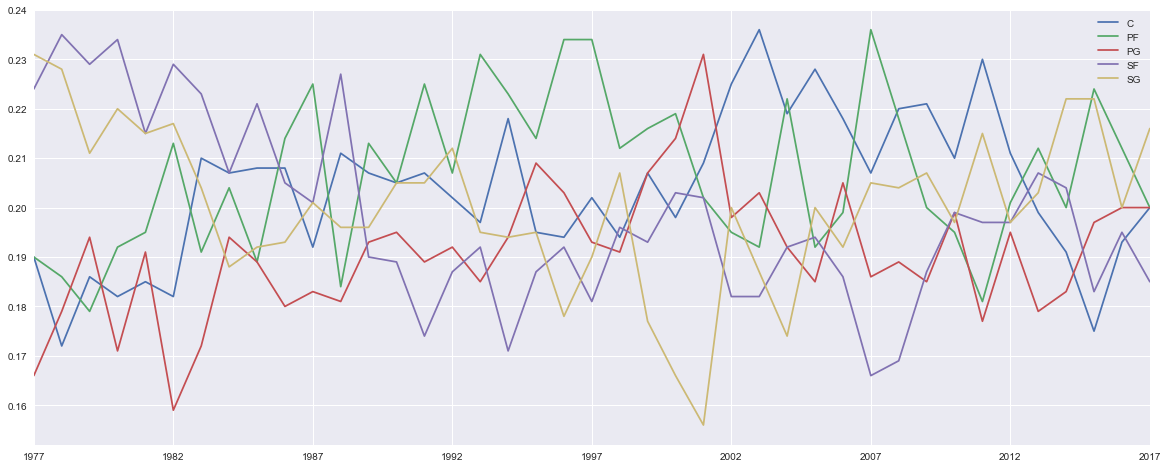

In [148]:
#Here we will generate a line graph to better visualize the data.
df_p2.transpose().plot(figsize=(20,8));